# Drive & Predict


## Exploratory Data Analysis

In the following paragraphs, we are going to explore our dataset. After downloading the data, we will look at the data structure, 
the features types, any missing values. Then I will try to find valuable insights.

### Import librairies

In [1]:
## Import
%load_ext autoreload
%autoreload 2

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Module containing custom functions
import models.data as mdt
import models.report as rpt

# Remove warnings display
import warnings
warnings.filterwarnings('ignore')

# Fix issue with libomp conflicts
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Loading dataset

As the dataset is splitted in smaller CSV files, I have built a fucntion that process the folder containing all the CSV files
and load them as a single Dataframe (more details in function load_dataset_as_dataframe models/data.py file).

Each CSV file can be seen as a driving time serie were driving measures are collected through time. For the purpose of the sudy, we have merged all the driving time series into a single one. The time measures have been added so that we are not mixing data from different time series.

Bellow, the dataset (composed by 38 single CSV files) has been downloaded and transformed as a single pandas dataframe.

In [4]:
# Load data and display head
trip_data_df = mdt.load_dataset_as_dataframe('data/trip-data/processed-data')
trip_data_df.head()

,time,speed,shift,engine_Load,car_accel,rpm,pitch,lateral_acceleration,passenger_count,car_load,ac_status,window_opening,radio_volume,rain_intensity,visibility,driver_wellbeing,driver_rush,idx
0,0.023,0.0,0,0.0,0.0,0.0,0.38471,-0.0,2,3,0,6,2,0,10,7,0,0
1,0.029,0.0,0,0.0,0.0,0.0,0.39524,-0.0,2,3,0,6,2,0,10,7,0,1
2,0.039,0.0,0,0.0,0.0,0.0,0.40598,-0.0,2,3,0,6,2,0,10,7,0,2
3,0.049,0.0,0,0.0,0.0,0.0,0.41721,-0.0,2,3,0,6,2,0,10,7,0,3
4,0.058,0.0,0,0.0,0.0,0.0,0.42753,-0.0,2,3,0,6,2,0,10,7,0,4


### Exploring dataset structure

In [5]:
# Display data info / describe
trip_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7748753 entries, 0 to 7748752
Data columns (total 18 columns):
time                    float64
speed                   float64
shift                   int64
engine_Load             float64
car_accel               float64
rpm                     float64
pitch                   float64
lateral_acceleration    float64
passenger_count         int64
car_load                int64
ac_status               int64
window_opening          int64
radio_volume            int64
rain_intensity          int64
visibility              int64
driver_wellbeing        int64
driver_rush             int64
idx                     int64
dtypes: float64(7), int64(11)
memory usage: 1.0 GB


In [6]:
# Display dataframe describe
trip_data_df.describe()

,time,speed,shift,engine_Load,car_accel,rpm,pitch,lateral_acceleration,passenger_count,car_load,ac_status,window_opening,radio_volume,rain_intensity,visibility,driver_wellbeing,driver_rush,idx
count,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06,7.748753e+06
mean,3.877428e+04,7.849732e+00,1.760373e+00,7.749423e+00,1.598307e-01,1.594698e+03,9.360308e-01,-1.385369e-02,4.389443e-01,3.821738e+00,1.267436e-01,7.531711e-01,3.965360e+00,3.229290e-01,9.476609e+00,5.820096e+00,2.833010e+00,3.874376e+06
std,2.238545e+04,7.356323e+00,1.867546e+00,7.092646e+00,7.980135e-01,7.070260e+02,2.259470e+00,4.297008e-01,8.644514e-01,1.708074e+00,4.159354e-01,1.402824e+00,2.014243e+00,7.256086e-01,7.653467e-01,1.450747e+00,1.300116e+00,2.236872e+06
min,2.300000e-02,-5.030800e+01,0.000000e+00,-1.000000e+00,-7.377400e+01,-1.000000e+00,-5.302900e+01,-5.963300e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,1.937565e+04,5.909900e-01,0.000000e+00,3.100000e+00,-1.933200e-01,8.814200e+02,3.430900e-01,-4.617100e-02,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,9.000000e+00,5.000000e+00,2.000000e+00,1.937188e+06
50%,3.878311e+04,6.673900e+00,1.000000e+00,4.622100e+00,1.550200e-01,1.579500e+03,1.144500e+00,-1.071600e-07,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,1.000000e+01,6.000000e+00,3.000000e+00,3.874376e+06
75%,5.815870e+04,1.223000e+01,3.000000e+00,1.002200e+01,4.934900e-01,2.080800e+03,1.809800e+00,3.239900e-02,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,1.000000e+01,7.000000e+00,3.000000e+00,5.811564e+06
max,7.753656e+04,3.234300e+01,5.000000e+00,7.535900e+01,6.485500e+00,6.060300e+03,1.481900e+01,5.776800e+00,4.000000e+00,8.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,3.000000e+00,1.000000e+01,8.000000e+00,5.000000e+00,7.748752e+06


**Observations** : We have here a large dataset (almost 8M observations) which is composed exclusively by numerical data (`int64` or `float64`). We can notice that some categorical features like `driver_wellbeing` or `driver_rush` are typed as `int64`. For further data modeling, we will have to transform those features.

### Missing & Null values

Further EDA needs to determine if we have any missing values in our dataset.

In [7]:
# Counting number of missing values
trip_data_df.isna().count()

time                    7748753
speed                   7748753
shift                   7748753
engine_Load             7748753
car_accel               7748753
rpm                     7748753
pitch                   7748753
lateral_acceleration    7748753
passenger_count         7748753
car_load                7748753
ac_status               7748753
window_opening          7748753
radio_volume            7748753
rain_intensity          7748753
visibility              7748753
driver_wellbeing        7748753
driver_rush             7748753
idx                     7748753
dtype: int64

**Observations** : Good news, it looks like that we do not have any missing values in our dataset.

### Plotting features correlations


To explore features correlations, we will plot the correlation heatmap.

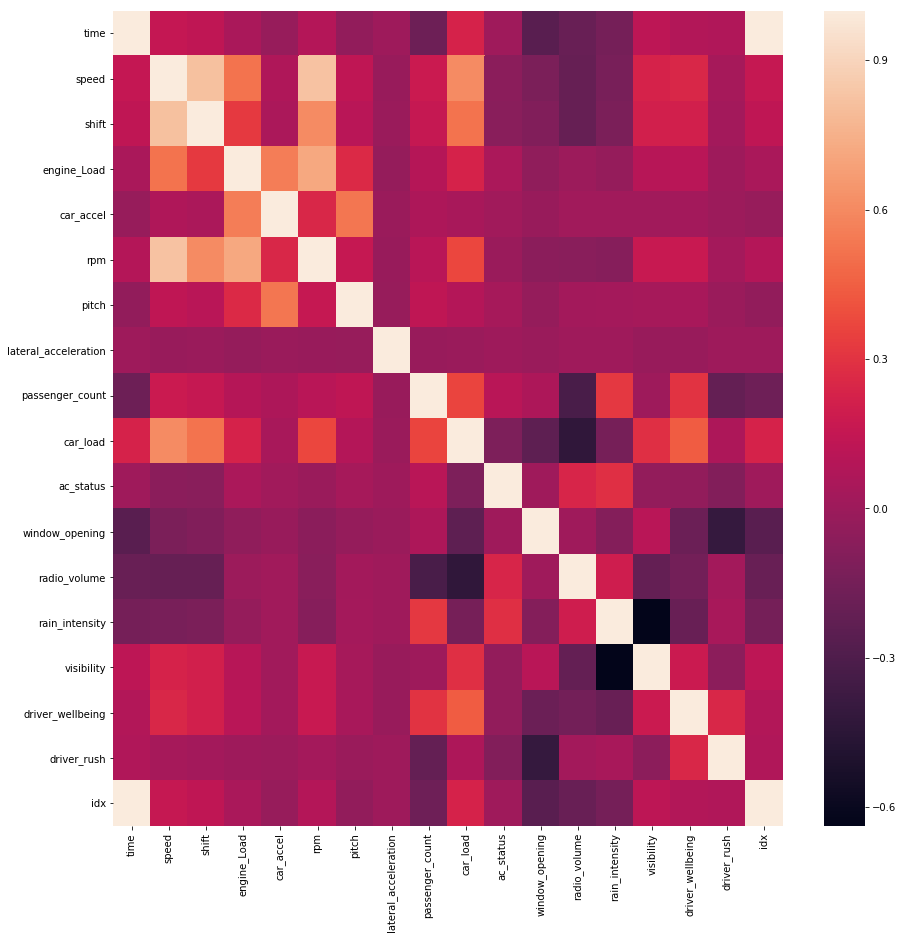

In [8]:
# Plot correlation heatmap.
plt.figure(figsize=(15,15))
sns.heatmap(trip_data_df.corr());

**Observations** : 
* `idx` | `time` : The `idx` feature has been built during the CSV files aggregation process in order to keep the timeseries order and it is highly related to the time feature as it increases over time.
* `speed` | `shift` | `engine_load` | `rpm` : Not so surprisingly `speed`, `shift`, `engine_load` and `rpm` are highly correlated.
* `rain_intensity` | `visibility` : Negatively correlated, the more rain the less visibility.
* `car_load` | `radio_volume`: The more people in the car the less radio volume.

### Plotting features distributions

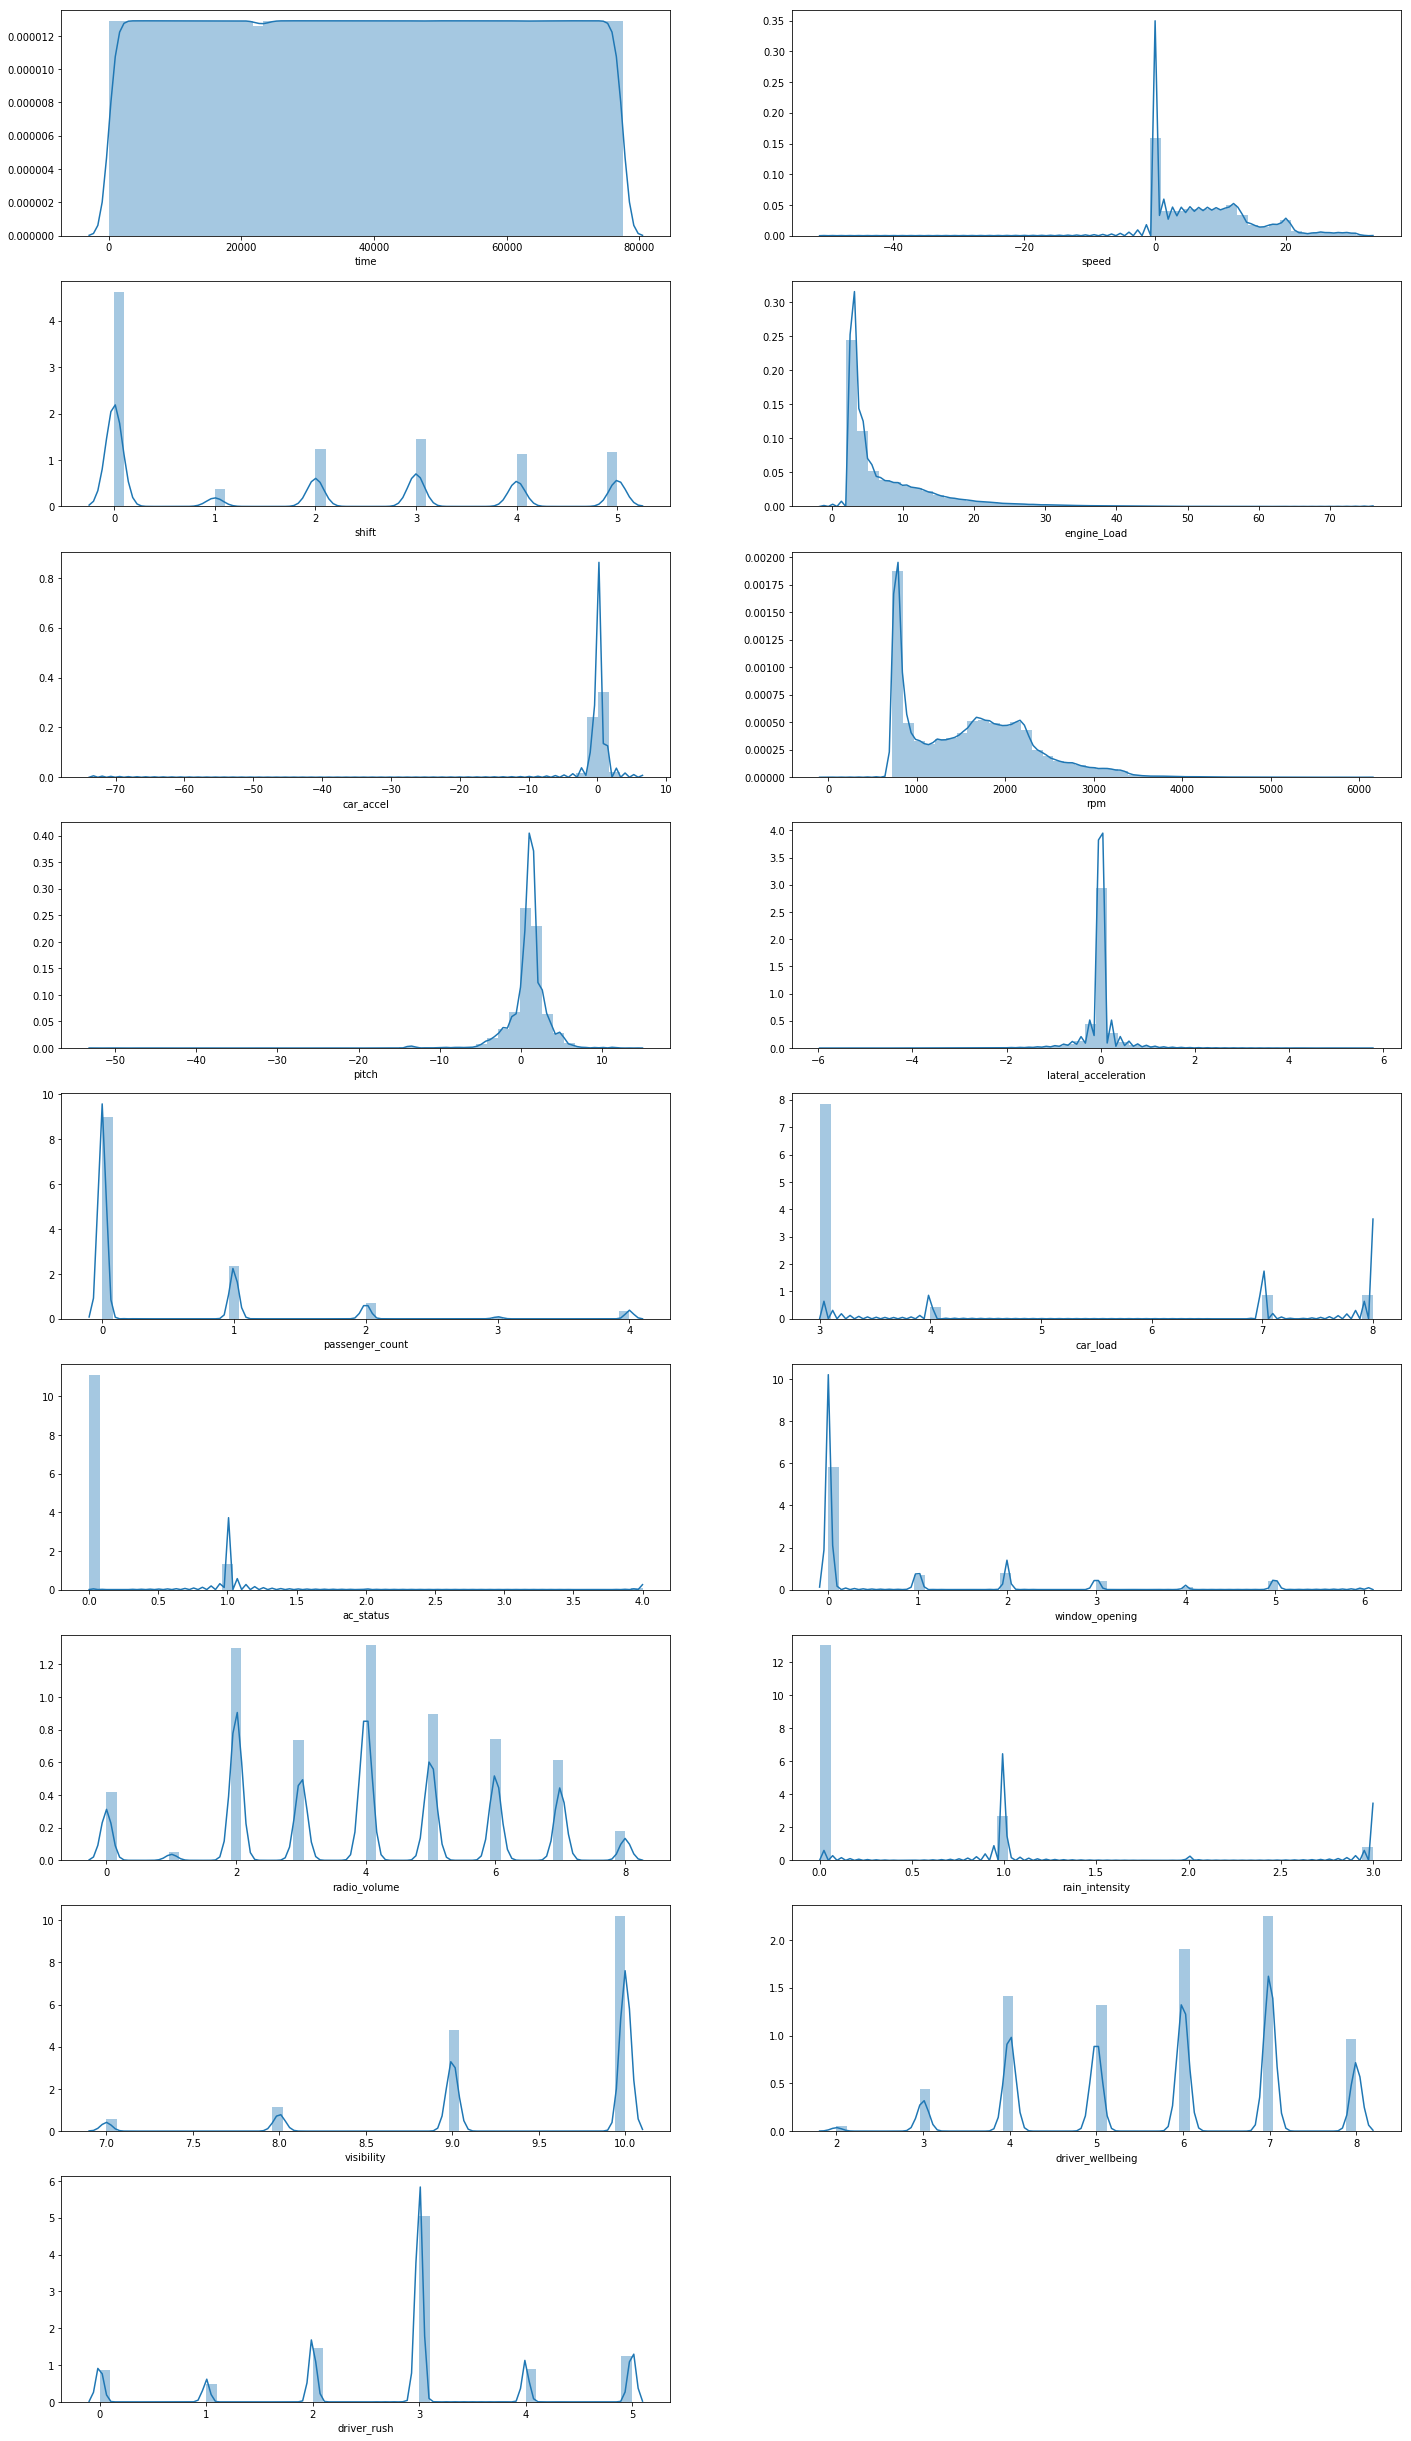

In [9]:
# Plot features distributions.
mdt.plot_feature_distributions(trip_data_df, figsize=(24,44))

**Observations** : The `speed` and `car_accel` distributions show outliers in the observations. Those outliers should be removed from the dataset.

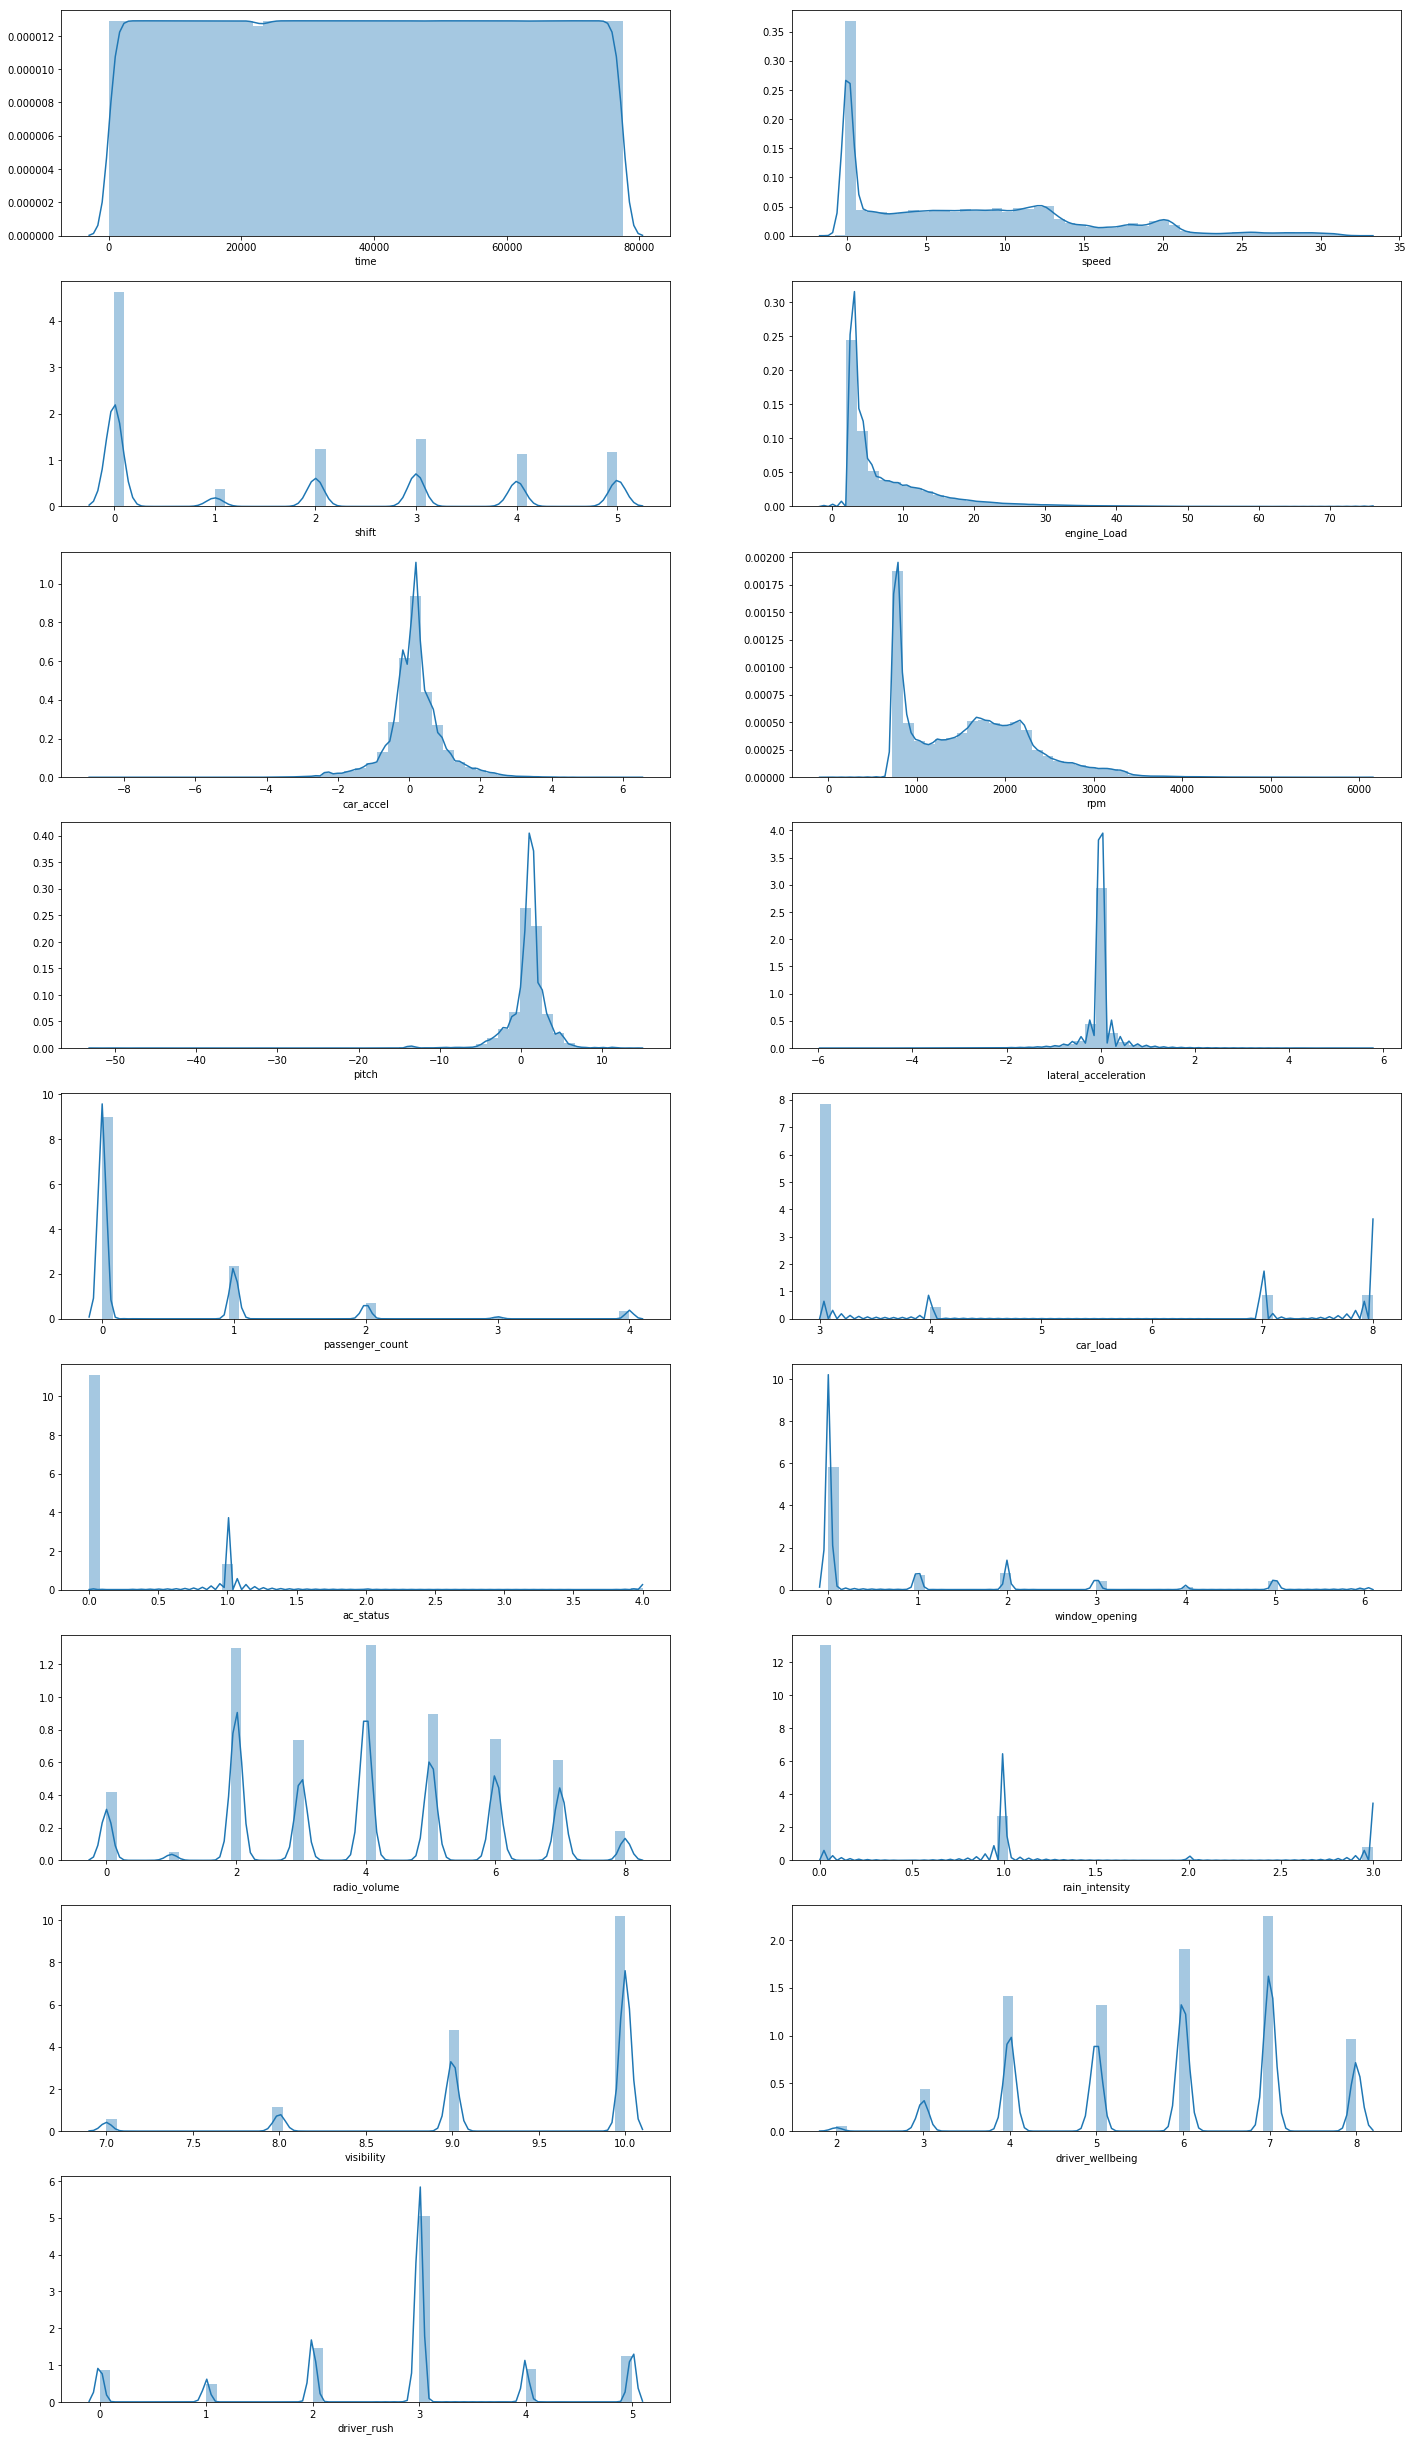

In [10]:
# Removes outliers from dataset
cleaned_df = trip_data_df[trip_data_df.speed > -10 ][trip_data_df.car_accel > -10]
mdt.plot_feature_distributions(cleaned_df, figsize=(24,44))

## Data Visualisation

Now, let's explore our data and each of the events we are interested in :

* braking
* acceleration
* turning

To extract those events, we need to identify which available features are changing significantly when it happens.
For brakes and starts, the `acceleration` feature is a good predictor as it reflects the increase or decrease in speed
at a specific time (negative value corresponds to a brake, positive value to a start or acceleration).
On the other hand, turns won't use `acceleration` to be detected but instead `lateral_acceleration`.

So for each of those event type, we have to choose a threshold value that allows us to tag an driving observation as part of an event.
Some indications of what is a safe brake or acceleration can be found [here](https://copradar.com/chapts/references/acceleration.html)

| Event        | feature   | threshold   |
|--------------|-----------|-------------|
| Braking      | car_accel | -2 $m/s^2$  |
| Acceleration | car_accel | 2 $m/s^2$   |
| Turning      | lat_accel | 2 $m/s^2$   |

To put it in perspective, a average muscle car reachs 60 mph in 5s (~5.4 $m/s^2$ acceleration). A professional driver is able to brake at 6.5 $m/s^2$ where a safe brake is ~3 $m/s^2$

### Braking event data analysis

In order to analyse the braking events during the trips, we need to extract the related time series from the existing dataframe.
This operation is made by first filtering out the observations where `car_accel` are below a specific threshold (-2$m/s^2$ in our case)
and then generate a list of brake event time series. The detail implementation is available in `extract_events` inside `models/data.py`

Once the list has been generated, we will calculate metrics data on each event.

In [11]:
# Extracting braking events
braking_entries_df = mdt.filter_acceleration_entries(cleaned_df, threshold=-2, above=False)
braking_events = mdt.extract_events(braking_entries_df)
braking_events[0]  # Display first element

,time,speed,shift,engine_Load,car_accel,rpm,pitch,lateral_acceleration,passenger_count,car_load,ac_status,window_opening,radio_volume,rain_intensity,visibility,driver_wellbeing,driver_rush,idx
2159,21.609,4.1771,0,4.2870,-2.0078,1374.6,0.68389,1.00880,2,3,0,6,2,0,10,7,0,2159
2160,21.619,4.1549,0,4.2808,-2.0193,1372.5,0.69188,0.97848,2,3,0,6,2,0,10,7,0,2160
2161,21.629,4.1338,0,4.2746,-2.0281,1370.4,0.69990,0.97352,2,3,0,6,2,0,10,7,0,2161
2162,21.639,4.1147,0,4.2684,-2.0343,1368.2,0.70796,0.93610,2,3,0,6,2,0,10,7,0,2162
2163,21.649,4.0964,0,4.2621,-2.0382,1366.0,0.71605,0.93194,2,3,0,6,2,0,10,7,0,2163
2164,21.658,4.0775,0,4.2559,-2.0400,1363.8,0.72417,0.88278,2,3,0,6,2,0,10,7,0,2164
2165,21.668,4.0557,0,4.2497,-2.0402,1361.6,0.73233,0.87805,2,3,0,6,2,0,10,7,0,2165
2166,21.679,4.0368,0,4.2435,-2.0389,1359.3,0.74051,0.84974,2,3,0,6,2,0,10,7,0,2166
2167,21.689,4.0179,0,4.2373,-2.0367,1356.9,0.74872,0.84576,2,3,0,6,2,0,10,7,0,2167
2168,21.699,3.9957,0,4.2311,-2.0336,1354.5,0.75696,0.80114,2,3,0,6,2,0,10,7,0,2168


In [12]:
# Calculate braking events metrics
braking_event_metrics_df = mdt.get_events_metrics(braking_events)
braking_event_metrics_df.head()

,observations,speed_mean,speed_std,speed_min,speed_25,speed_50,speed_75,speed_max,car_accel_mean,car_accel_std,...,shift_std,shift_min,shift_25,shift_50,shift_75,shift_max,driver_rush,visibility,rain_intensity,driver_wellbeing
0,16.0,4.024656,0.096780,3.86830,3.948175,4.02735,4.100975,4.1771,-2.026450,0.012233,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,7.0
1,155.0,5.693708,1.099900,3.83170,4.711150,5.71820,6.671100,7.5014,-2.289961,0.167247,...,1.366148,0.0,0.0,0.0,3.0,3.0,0.0,10.0,0.0,7.0
2,48.0,1.176983,0.345740,0.62805,0.877075,1.16750,1.470800,1.7265,-2.263271,0.136658,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,7.0
3,50.0,5.339104,1.394185,2.89410,3.823725,5.99400,6.274925,6.5514,-2.020526,0.020398,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,7.0
4,53.0,5.611021,0.342524,5.02340,5.324500,5.62510,5.898900,6.1818,-2.025408,0.011703,...,0.000000,2.0,2.0,2.0,2.0,2.0,0.0,10.0,0.0,7.0


In [13]:
# Rescale numerical data
rescaled_braking_df = mdt.rescale_events_metrics(braking_event_metrics_df)
rescaled_braking_df.head()

,speed_mean,speed_std,speed_min,speed_25,speed_50,speed_75,speed_max,car_accel_mean,car_accel_std,car_accel_min,...,shift_std,shift_min,shift_25,shift_50,shift_75,shift_max,driver_rush,visibility,rain_intensity,driver_wellbeing
0,-0.508598,-0.950838,-0.178321,-0.343130,-0.503691,-0.644533,-0.760158,0.884279,-0.951679,0.938255,...,-0.524587,-0.344453,-0.376770,-0.450495,-0.559719,-0.710157,0.0,10.0,0.0,7.0
1,-0.092257,0.236474,-0.187572,-0.149605,-0.085440,-0.037337,-0.011640,0.169782,-0.120546,0.200402,...,1.948424,-0.344453,-0.376770,-0.450495,1.592388,1.259270,0.0,10.0,0.0,7.0
2,-1.218944,-0.656164,-0.997315,-1.122102,-1.211105,-1.265917,-1.311948,0.242150,-0.284553,0.337230,...,-0.524587,-0.344453,-0.376770,-0.450495,-0.559719,-0.710157,0.0,10.0,0.0,7.0
3,-0.180713,0.584795,-0.424556,-0.374696,-0.017218,-0.130934,-0.225547,0.900341,-0.907901,0.888145,...,-0.524587,-0.344453,-0.376770,-0.450495,-0.559719,-0.710157,0.0,10.0,0.0,7.0
4,-0.112884,-0.659971,0.113638,0.005969,-0.108470,-0.219770,-0.308769,0.887105,-0.954521,0.932404,...,-0.524587,1.628169,1.432342,1.157046,0.875019,0.602794,0.0,10.0,0.0,7.0


In [14]:
# Numbers of braking in dataset
len(rescaled_braking_df)

587

In [15]:
# Sort entries by driver rush feature for better visualisation.
sorted_braking_df = rescaled_braking_df.sort_values(by=['driver_rush', 'car_accel_25']).reset_index()
sorted_braking_df.head()

,index,speed_mean,speed_std,speed_min,speed_25,speed_50,speed_75,speed_max,car_accel_mean,car_accel_std,...,shift_std,shift_min,shift_25,shift_50,shift_75,shift_max,driver_rush,visibility,rain_intensity,driver_wellbeing
0,262,-1.161387,0.686238,-1.156477,-1.344491,-1.499548,-0.921367,-1.029253,-5.802096,2.449118,...,-0.524587,-0.344453,-0.37677,-0.450495,-0.559719,-0.710157,0.0,10.0,0.0,2.0
1,494,0.117295,2.292813,-0.753039,-0.268818,0.067082,0.515729,0.835793,-2.968576,1.756474,...,0.625241,-0.344453,-0.37677,-0.450495,-0.559719,0.602794,0.0,10.0,0.0,3.0
2,487,-0.228858,1.399583,-0.701881,-0.520701,-0.221477,0.089714,0.182633,-1.361046,1.943233,...,1.569347,-0.344453,-0.37677,-0.450495,-0.559719,1.259270,0.0,10.0,0.0,3.0
3,31,0.812739,0.124177,0.773837,0.789087,0.819826,0.805763,0.743250,-1.728577,1.809786,...,-0.524587,-0.344453,-0.37677,-0.450495,-0.559719,-0.710157,0.0,9.0,0.0,6.0
4,23,0.026966,2.825155,-0.884447,-0.546675,0.151482,0.589782,0.836468,-1.748552,2.143269,...,2.189853,-0.344453,-0.37677,1.960816,1.592388,1.259270,0.0,9.0,0.0,5.0


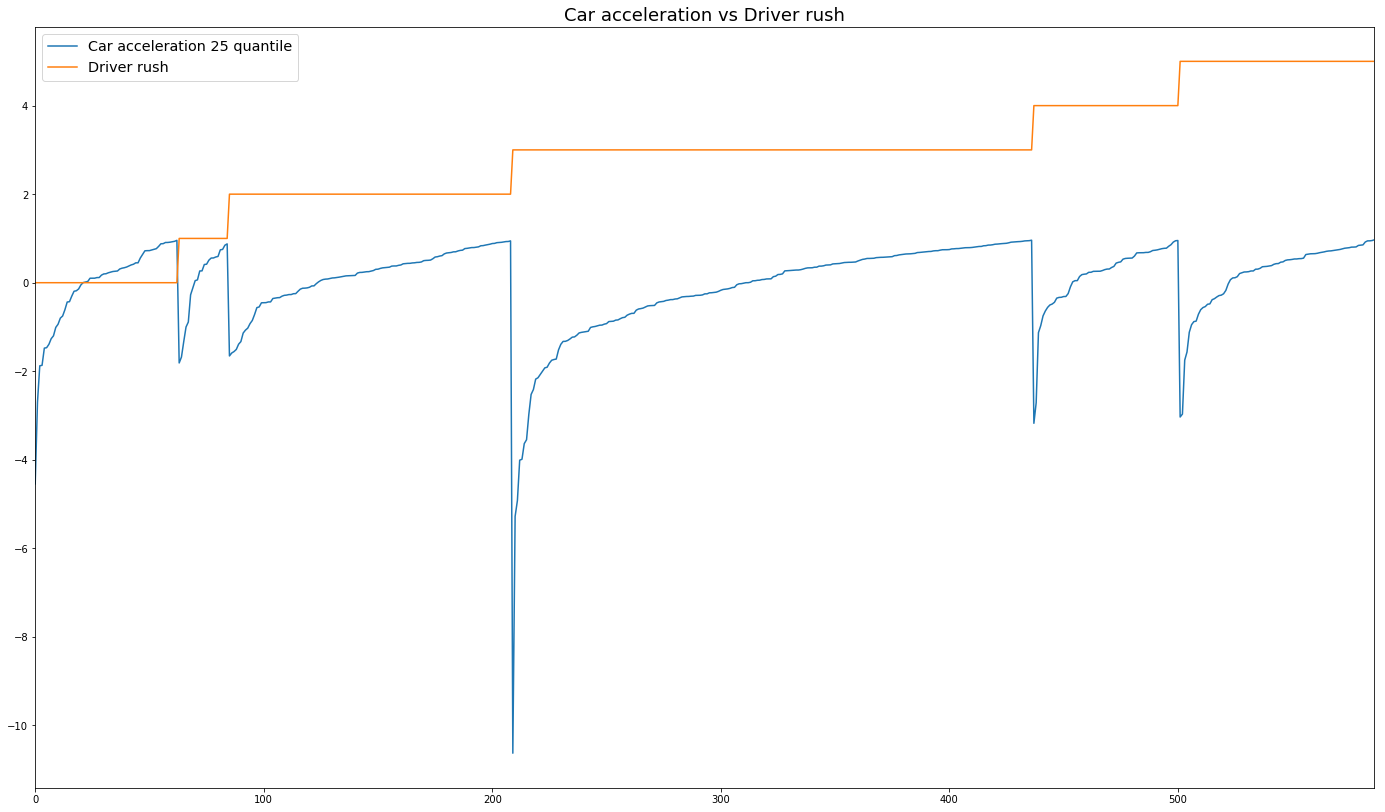

In [16]:
# Plot Car acceleration 25 quantile versus Driver rush
plt.figure(figsize=(24,14))
sorted_braking_df.car_accel_25.plot(label='Car acceleration 25 quantile')
sorted_braking_df.driver_rush.plot(label='Driver rush')
plt.legend(fontsize='x-large')
plt.title('Car acceleration vs Driver rush', fontdict={'fontsize': 18});

**Observations** : It looks like there is more harsh brakings when the `driver_rush` indicator goes up. We picked the 25% quantile as it represents the value of the 25% biggest decelerations in each braking.

In [17]:
# Display statistics around harsh brakings.
print('---   Driver Rush >= 3   ---')
mdt.calculate_harsh_braking_ratio(sorted_braking_df[sorted_braking_df.driver_rush >= 3], threshold=-3, verbose=True)

print('---   Driver Rush < 3   ---')
mdt.calculate_harsh_braking_ratio(sorted_braking_df[sorted_braking_df.driver_rush < 3], threshold=-3, verbose=True)

---   Driver Rush >= 3   ---
---------------------------
Harsh braking ratio :  0.024
Harsh braking count :  9
Total braking count :  378
---------------------------
---   Driver Rush < 3   ---
---------------------------
Harsh braking ratio :  0.005
Harsh braking count :  1
Total braking count :  209
---------------------------


0.005

**Observations** : The ratio of harsh braking is significantly higher when `driver_rush` is above 3 compared to < 3. This ratio can be a good indicator of a aggressive driving.

### Acceleration event Data Analysis


Identically to the braking events, we need to extract the related acceleration events from the dataset.
This operation is made by first filtering out the observations where `car_accel` are above a specific threshold (2$m/s^2$ in our case)
and then generate a list of acceleration events. The detail implementation is available in `extract_events` inside `models/data.py`

Once the list has been generated, we will calculate metrics data on each event.

In [18]:
# Extracting acceleration events
acceleration_entries_df = mdt.filter_acceleration_entries(cleaned_df, threshold=2)
acceleration_events = mdt.extract_events(acceleration_entries_df)
acceleration_events[0].head()  # Display first element

,time,speed,shift,engine_Load,car_accel,rpm,pitch,lateral_acceleration,passenger_count,car_load,ac_status,window_opening,radio_volume,rain_intensity,visibility,driver_wellbeing,driver_rush,idx
2487,24.889,1.1606,0,10.243,2.0142,1290.0,1.7696,0.065575,2,3,0,6,2,0,10,7,0,2487
2488,24.899,1.1812,0,10.296,2.0439,1295.3,1.7584,0.066739,2,3,0,6,2,0,10,7,0,2488
2489,24.909,1.2034,0,10.348,2.0738,1300.7,1.7472,0.070398,2,3,0,6,2,0,10,7,0,2489
2490,24.920,1.2276,0,10.399,2.1037,1306.0,1.7359,0.071815,2,3,0,6,2,0,10,7,0,2490
2491,24.929,1.2440,0,10.448,2.1339,1311.3,1.7246,0.074018,2,3,0,6,2,0,10,7,0,2491


In [19]:
# Calculate acceleration events metrics
acceleration_event_metrics_df = mdt.get_events_metrics(acceleration_events)
acceleration_event_metrics_df.head()

,observations,speed_mean,speed_std,speed_min,speed_25,speed_50,speed_75,speed_max,car_accel_mean,car_accel_std,...,shift_std,shift_min,shift_25,shift_50,shift_75,shift_max,driver_rush,visibility,rain_intensity,driver_wellbeing
0,78.0,2.053231,0.522632,1.16060,1.596175,2.06545,2.522300,2.8908,2.400074,0.190180,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,7.0
1,125.0,2.498723,1.143994,0.75815,1.568700,2.31450,3.805800,4.4525,2.321536,0.259263,...,0.450806,0.0,0.0,0.0,1.0,1.0,0.0,10.0,0.0,7.0
2,245.0,3.021044,1.498378,0.25475,1.541800,3.16830,4.258500,5.3806,2.205120,0.188419,...,0.446652,0.0,0.0,1.0,1.0,1.0,0.0,10.0,0.0,7.0
3,100.0,2.027818,1.130195,0.47692,1.016398,1.97800,2.576625,4.1245,2.744227,0.556290,...,0.386123,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,7.0
4,37.0,6.963027,0.196819,6.63680,6.805400,6.96620,7.133000,7.2890,2.058884,0.025854,...,0.000000,2.0,2.0,2.0,2.0,2.0,0.0,10.0,0.0,7.0


In [20]:
# Rescale numerical data
rescaled_acceleration_df = mdt.rescale_events_metrics(acceleration_event_metrics_df)
rescaled_acceleration_df.head()

,speed_mean,speed_std,speed_min,speed_25,speed_50,speed_75,speed_max,car_accel_mean,car_accel_std,car_accel_min,...,shift_std,shift_min,shift_25,shift_50,shift_75,shift_max,driver_rush,visibility,rain_intensity,driver_wellbeing
0,-0.685852,-0.464249,-0.523012,-0.610954,-0.686358,-0.730815,-0.756921,-0.050849,-0.237398,0.052285,...,-0.763770,-0.478639,-0.613495,-0.775356,-0.987559,-1.12981,0.0,10.0,0.0,7.0
1,-0.565253,0.311210,-0.631859,-0.618502,-0.618900,-0.400098,-0.382496,-0.290906,0.103539,-0.645926,...,0.624184,-0.478639,-0.613495,-0.775356,0.160735,0.00000,0.0,10.0,0.0,7.0
2,-0.423855,0.753481,-0.768008,-0.625891,-0.387637,-0.283452,-0.159980,-0.646737,-0.246086,-0.833906,...,0.611396,-0.478639,-0.613495,0.362124,0.160735,0.00000,0.0,10.0,0.0,7.0
3,-0.692732,0.293989,-0.707920,-0.770221,-0.710045,-0.716817,-0.461136,1.001072,1.569409,-0.901042,...,0.425037,-0.478639,-0.613495,-0.775356,-0.987559,0.00000,0.0,10.0,0.0,7.0
4,0.643282,-0.870865,0.958077,0.820040,0.641075,0.457214,0.297568,-1.093716,-1.048365,-0.793624,...,-0.763770,2.161987,1.741892,1.499604,1.309029,1.12981,0.0,10.0,0.0,7.0


In [21]:
# Numbers of accelerations in dataset
len(rescaled_acceleration_df)

1302

In [22]:
# Sort entries by driver rush feature for better visualisation.
sorted_acceleration_df = rescaled_acceleration_df.sort_values(by=['driver_rush', 'car_accel_75']).reset_index()
sorted_acceleration_df.head()

,index,speed_mean,speed_std,speed_min,speed_25,speed_50,speed_75,speed_max,car_accel_mean,car_accel_std,...,shift_std,shift_min,shift_25,shift_50,shift_75,shift_max,driver_rush,visibility,rain_intensity,driver_wellbeing
0,64,-0.186312,-1.025069,0.187052,0.006147,-0.189731,-0.361622,-0.488995,-1.252531,-1.160787,...,-0.76377,0.841674,0.564198,0.362124,0.160735,0.00000,0.0,9.0,0.0,4.0
1,68,0.244456,-1.046285,0.624980,0.447061,0.240901,0.044714,-0.113395,-1.236963,-1.147957,...,-0.76377,2.161987,1.741892,1.499604,1.309029,1.12981,0.0,9.0,0.0,4.0
2,27,0.173638,-1.047580,0.553795,0.374676,0.170477,-0.022151,-0.176355,-1.224814,-1.135594,...,-0.76377,2.161987,1.741892,1.499604,1.309029,1.12981,0.0,10.0,0.0,7.0
3,45,0.510768,-1.036060,0.887893,0.715268,0.507498,0.299818,0.126623,-1.208771,-1.116517,...,-0.76377,2.161987,1.741892,1.499604,1.309029,1.12981,0.0,9.0,0.0,5.0
4,38,0.770102,-0.982662,1.126249,0.968820,0.767487,0.556107,0.372348,-1.201850,-1.118237,...,-0.76377,2.161987,1.741892,1.499604,1.309029,1.12981,0.0,10.0,0.0,7.0


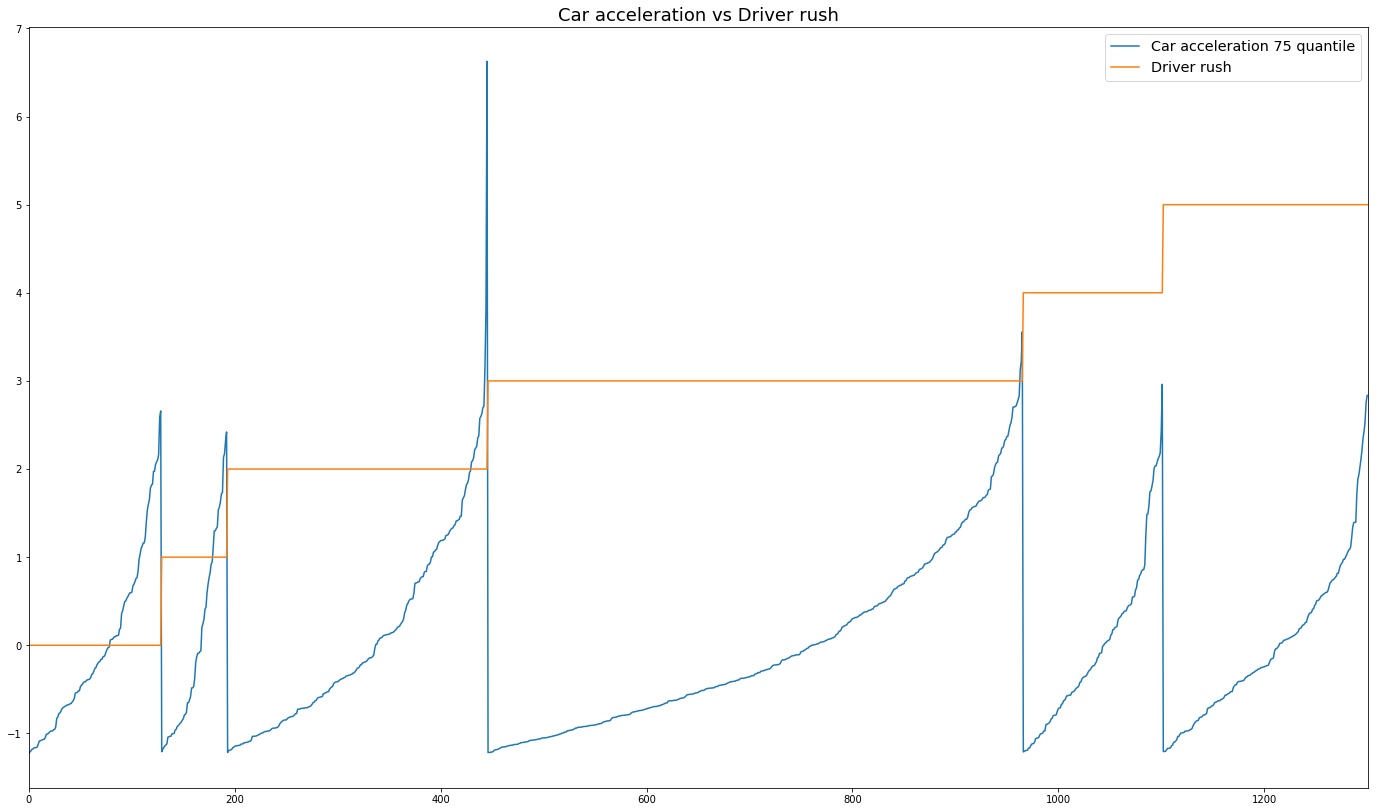

In [23]:
# Plot Car acceleration 75 quantile versus Driver rush
plt.figure(figsize=(24,14))
sorted_acceleration_df.car_accel_75.plot(label='Car acceleration 75 quantile')
sorted_acceleration_df.driver_rush.plot(label='Driver rush')
plt.legend(fontsize='x-large')
plt.title('Car acceleration vs Driver rush', fontdict={'fontsize': 18});

**Observations** : It doesn't look like there is more harsh accelerations when the `driver_rush` indicator goes up. We picked the 75% quantile of `car_accel` as it represents the value of the 75% biggest accelerations in each acceleration.

In [24]:
# Display statistics around harsh accelerations.
print('---   Driver Rush >= 3   ---')
mdt.calculate_harsh_acceleration_ratio(sorted_acceleration_df[sorted_acceleration_df.driver_rush >= 3], threshold=2.5, verbose=True)

print('---   Driver Rush < 3   ---')
mdt.calculate_harsh_acceleration_ratio(sorted_acceleration_df[sorted_acceleration_df.driver_rush < 3], threshold=2.5, verbose=True)

---   Driver Rush >= 3   ---
---------------------------
Harsh acceleration ratio :  0.02
Harsh acceleration count :  17
Total acceleration count :  856
---------------------------
---   Driver Rush < 3   ---
---------------------------
Harsh acceleration ratio :  0.022
Harsh acceleration count :  10
Total acceleration count :  446
---------------------------


0.022

**Observations** : The ratio of harsh acceleration is not significantly higher when driver_rush is above 3 compared to < 3.

### Turning event Data Analysis


in order to extract turning events, we need to introduce a new feature `turn_radius`. `turn_radius` can be calculated given
`lateral_acceleration` and `speed` ([reference](https://www.mrwaynesclass.com/circular/notes/corner/home.htm)). The physics formula is described bellow :

$$\text{lateral acceleration} = \frac{v^2}{r}$$

where $r$ is the turn radius and $v$ the speed


After calculating the new feature `turn_radius`, we will filter the observations by `speed` and `turn_radius`. The threshold for `turn_radius` 
is set to 40 meters and for speed ~20km/h (~5.5m/s).

Once the list of turning events has been generated, we will calculate metrics data on each event.

In [25]:
# Calculate new feature turnn_radius in meters
cleaned_df['turn_radius'] = ((cleaned_df.speed)**2 / np.abs(cleaned_df.lateral_acceleration))
cleaned_df.head()

,time,speed,shift,engine_Load,car_accel,rpm,pitch,lateral_acceleration,passenger_count,car_load,ac_status,window_opening,radio_volume,rain_intensity,visibility,driver_wellbeing,driver_rush,idx,turn_radius
0,0.023,0.0,0,0.0,0.0,0.0,0.38471,-0.0,2,3,0,6,2,0,10,7,0,0,NaN
1,0.029,0.0,0,0.0,0.0,0.0,0.39524,-0.0,2,3,0,6,2,0,10,7,0,1,NaN
2,0.039,0.0,0,0.0,0.0,0.0,0.40598,-0.0,2,3,0,6,2,0,10,7,0,2,NaN
3,0.049,0.0,0,0.0,0.0,0.0,0.41721,-0.0,2,3,0,6,2,0,10,7,0,3,NaN
4,0.058,0.0,0,0.0,0.0,0.0,0.42753,-0.0,2,3,0,6,2,0,10,7,0,4,NaN


In [26]:
# Extract turning events df
turning_df = cleaned_df[cleaned_df.turn_radius < 40][cleaned_df.turn_radius > 0][cleaned_df.speed > 5.5]
turning_df.head()

,time,speed,shift,engine_Load,car_accel,rpm,pitch,lateral_acceleration,passenger_count,car_load,ac_status,window_opening,radio_volume,rain_intensity,visibility,driver_wellbeing,driver_rush,idx,turn_radius
2895,28.969,5.5023,2,6.52,0.107680,1580.2,0.003769,0.80609,2,3,0,6,2,0,10,7,0,2895,37.558220
2896,28.979,5.5088,2,6.46,0.096605,1580.2,0.011030,0.80704,2,3,0,6,2,0,10,7,0,2896,37.602693
2897,28.989,5.5152,2,6.40,0.087084,1580.1,0.018332,0.81901,2,3,0,6,2,0,10,7,0,2897,37.139267
2898,28.999,5.5175,2,6.34,0.078738,1579.9,0.025609,0.81935,2,3,0,6,2,0,10,7,0,2898,37.154825
2899,29.009,5.5206,2,6.28,0.070988,1579.7,0.032844,0.80325,2,3,0,6,2,0,10,7,0,2899,37.942141


In [27]:
# Extract turning events list
turning_events = mdt.extract_events(turning_df)

In [28]:
# Calculate turning events metrics
turning_event_metrics_df = mdt.get_events_metrics(turning_events)
turning_event_metrics_df.head()

,observations,speed_mean,speed_std,speed_min,speed_25,speed_50,speed_75,speed_max,car_accel_mean,car_accel_std,...,shift_std,shift_min,shift_25,shift_50,shift_75,shift_max,driver_rush,visibility,rain_intensity,driver_wellbeing
0,12.0,5.520667,0.012381,5.5023,5.513300,5.51905,5.530950,5.5395,0.035391,0.082598,...,0.000000,2.0,2.0,2.0,2.0,2.0,0.0,10.0,0.0,7.0
1,28.0,5.614361,0.055733,5.5077,5.572575,5.61675,5.662200,5.6982,-0.610131,0.150571,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,7.0
2,49.0,5.843388,0.216339,5.5055,5.661900,5.81810,6.023400,6.2315,1.245722,0.120640,...,0.000000,2.0,2.0,2.0,2.0,2.0,0.0,10.0,0.0,7.0
3,80.0,6.177128,0.295040,5.5071,5.957975,6.37350,6.402600,6.4259,1.518304,0.877620,...,0.466437,0.0,0.0,1.0,1.0,1.0,0.0,10.0,0.0,7.0
4,560.0,6.847343,1.040459,5.5043,5.856050,6.48600,7.719825,9.0682,0.751187,0.272535,...,0.000000,2.0,2.0,2.0,2.0,2.0,0.0,10.0,0.0,7.0


In [29]:
# Rescale numerical data
rescaled_turning_df = mdt.rescale_events_metrics(turning_event_metrics_df)
rescaled_turning_df.head()

,speed_mean,speed_std,speed_min,speed_25,speed_50,speed_75,speed_max,car_accel_mean,car_accel_std,car_accel_min,...,shift_std,shift_min,shift_25,shift_50,shift_75,shift_max,driver_rush,visibility,rain_intensity,driver_wellbeing
0,-0.942840,-1.160230,-0.530015,-0.724335,-0.916964,-1.102819,-1.262056,-0.620148,-0.865535,-0.135819,...,-0.574757,0.643679,0.506497,0.353317,0.234499,0.153811,0.0,10.0,0.0,7.0
1,-0.873755,-1.017381,-0.526102,-0.680545,-0.845386,-1.009656,-1.159453,-1.243447,-0.657624,-0.672488,...,-0.574757,-1.130419,-1.341773,-1.643692,-1.930104,-2.153356,0.0,10.0,0.0,7.0
2,-0.704881,-0.488173,-0.527696,-0.614554,-0.697872,-0.753272,-0.814660,0.548515,-0.749174,0.845356,...,-0.574757,0.643679,0.506497,0.353317,0.234499,0.153811,0.0,10.0,0.0,7.0
3,-0.458798,-0.228847,-0.526537,-0.395823,-0.290971,-0.484111,-0.688975,0.811712,1.566211,0.238976,...,0.539394,-1.130419,-1.341773,-0.645187,-0.847803,-0.999772,0.0,10.0,0.0,7.0
4,0.035387,2.227372,-0.528566,-0.471122,-0.208550,0.450871,1.019341,0.071006,-0.284572,0.130846,...,-0.574757,0.643679,0.506497,0.353317,0.234499,0.153811,0.0,10.0,0.0,7.0


In [30]:
# Sort entries by driver rush feature for better visualisation.
sorted_turning_df = rescaled_turning_df.sort_values(by=['driver_rush', 'car_accel_std']).reset_index()
sorted_turning_df.head()

,index,speed_mean,speed_std,speed_min,speed_25,speed_50,speed_75,speed_max,car_accel_mean,car_accel_std,...,shift_std,shift_min,shift_25,shift_50,shift_75,shift_max,driver_rush,visibility,rain_intensity,driver_wellbeing
0,331,0.109587,0.116767,0.020188,0.084690,0.131315,0.149893,0.091188,1.051453,-1.059608,...,-0.574757,0.643679,0.506497,0.353317,0.234499,0.153811,0.0,10.0,0.0,3.0
1,17,-0.795436,-0.748682,-0.526247,-0.655408,-0.771427,-0.894489,-0.989158,0.708990,-0.970036,...,-0.574757,-1.130419,-1.341773,-1.643692,-1.930104,-2.153356,0.0,10.0,0.0,7.0
2,27,-0.803587,-0.803537,-0.516611,-0.644917,-0.776849,-0.909856,-1.034350,-4.970840,-0.904021,...,-0.574757,-1.130419,-1.341773,-1.643692,-1.930104,-2.153356,0.0,9.0,0.0,5.0
3,330,-0.914705,-1.054600,-0.529435,-0.715765,-0.896487,-1.060833,-1.195529,0.500306,-0.896686,...,-0.574757,0.643679,0.506497,0.353317,0.234499,0.153811,0.0,10.0,0.0,3.0
4,26,0.147555,-0.232450,0.197117,0.192643,0.170218,0.110570,0.005458,0.912799,-0.876975,...,-0.574757,0.643679,0.506497,0.353317,0.234499,0.153811,0.0,9.0,0.0,5.0


Bellow we are trying to detect any difference between driver rush and car acceleration standard deviation. The standard deviation has been picked because it reflects the variation between the braking before the turn and the acceleration at the end of the turn. Usually in driving school they teach you to maintain your speed constant during the turn.

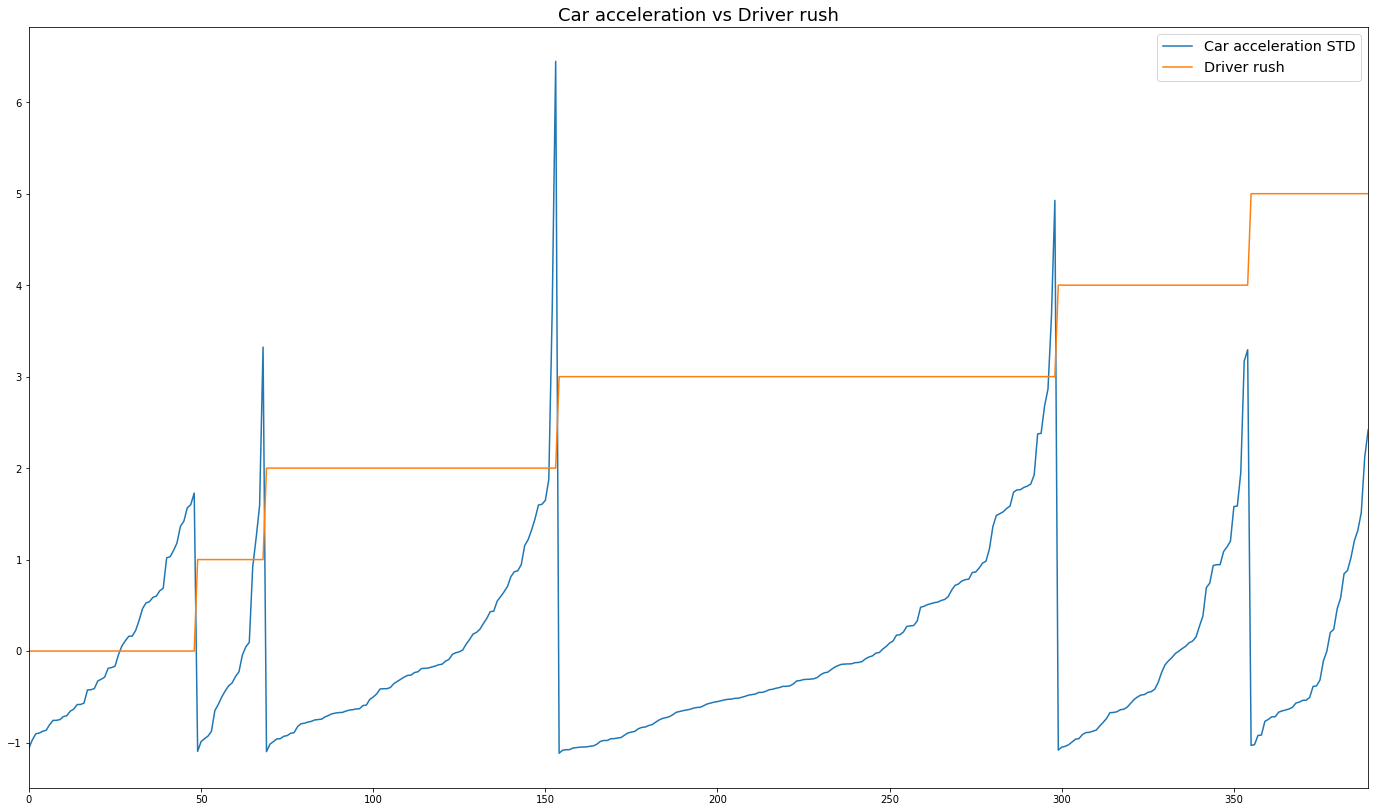

In [31]:
# Plot Car acceleration Standard Deviation versus Driver rush
plt.figure(figsize=(24,14))
sorted_turning_df.car_accel_std.plot(label='Car acceleration STD')
sorted_turning_df.driver_rush.plot(label='Driver rush')
plt.legend(fontsize='x-large')
plt.title('Car acceleration vs Driver rush', fontdict={'fontsize': 18});

**Observations** : I haven't been able to see any pattern regarding turning vs driver rush


### Conclusion

Before going further and start the modeling phase, I might highlight the fact that the observations from the EDA are not conclusives.
For the sake of the project, I will have to go ahead but it would be really important to get more data and especially more data coming
from distinct drivers. Here we only have the driving measurements for one driver-one car which obviouly is not ideal.

## Modeling

This step consists in trying to find the best model which can predict our target value `driver_rush`. 
As we have seen during our EDA, we still need to do some data engineering in order to deal with categorical features and rescale the 
numerical features. Once the data engineering is done, we will take the following pragmatic approach :

* Select list of known classification models
* Run a baseline model for each of our pre-selected models
* Pick the top models base on **precision**, **recall**, **f1-score** scores
* Tune the hyper-parameters of the top model and watch score increase

So below is the list of pre-selected classification models :

* Logistic Regression
* Decision Tree
* Random Forest
* AdaBoost
* K Nearest Neighbors
* XGBoost
* SVC (Support Vector Classification)
* Neural Network

### Preprocessing features

In the next step we are applying what as been seen during the EDA step : Converting categorical features and Scaling numerical features.

In order to make our process repeteable, we will introduce SKlearn Pipeline to streamline our preprocessing along with the modeling step.

The detailed implementation of the features preprocessing step can be found in the custom Class `BasePipeline` in `models.pipeline` module.

### Baseline models

Bellow, we train our pre-selected baseline models on our train dataset.

In [68]:
# Import models
from models.pipeline import BasePipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [69]:
# Extract features / target data
y = braking_event_metrics_df.driver_rush
X = braking_event_metrics_df.drop(columns=['driver_rush'])

In [70]:
# Train  Test Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

Tested Model:  lr


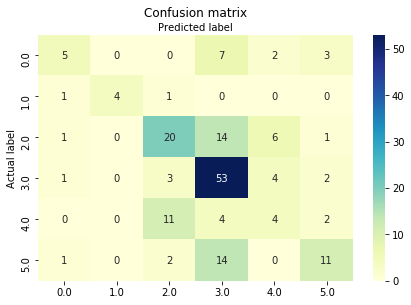

              precision    recall  f1-score   support

         0.0       0.56      0.29      0.38        17
         1.0       1.00      0.67      0.80         6
         2.0       0.54      0.48      0.51        42
         3.0       0.58      0.84      0.68        63
         4.0       0.25      0.19      0.22        21
         5.0       0.58      0.39      0.47        28

   micro avg       0.55      0.55      0.55       177
   macro avg       0.58      0.48      0.51       177
weighted avg       0.54      0.55      0.53       177



Tested Model:  dt_cls


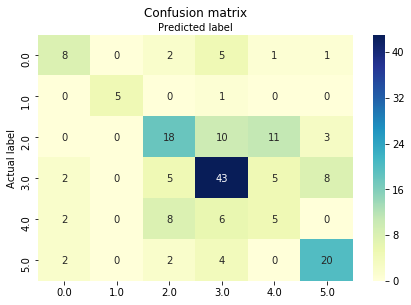

              precision    recall  f1-score   support

         0.0       0.57      0.47      0.52        17
         1.0       1.00      0.83      0.91         6
         2.0       0.51      0.43      0.47        42
         3.0       0.62      0.68      0.65        63
         4.0       0.23      0.24      0.23        21
         5.0       0.62      0.71      0.67        28

   micro avg       0.56      0.56      0.56       177
   macro avg       0.59      0.56      0.57       177
weighted avg       0.56      0.56      0.56       177



Tested Model:  rf_clf


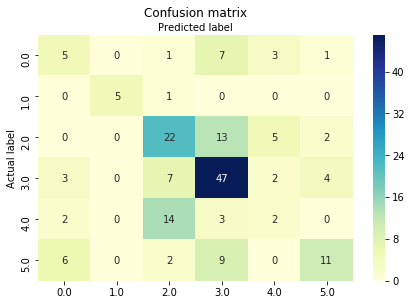

              precision    recall  f1-score   support

         0.0       0.31      0.29      0.30        17
         1.0       1.00      0.83      0.91         6
         2.0       0.47      0.52      0.49        42
         3.0       0.59      0.75      0.66        63
         4.0       0.17      0.10      0.12        21
         5.0       0.61      0.39      0.48        28

   micro avg       0.52      0.52      0.52       177
   macro avg       0.53      0.48      0.49       177
weighted avg       0.50      0.52      0.50       177



Tested Model:  adaboost_clf


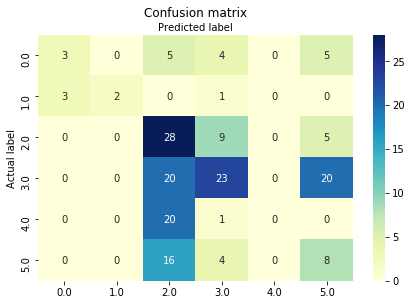

              precision    recall  f1-score   support

         0.0       0.50      0.18      0.26        17
         1.0       1.00      0.33      0.50         6
         2.0       0.31      0.67      0.43        42
         3.0       0.55      0.37      0.44        63
         4.0       0.00      0.00      0.00        21
         5.0       0.21      0.29      0.24        28

   micro avg       0.36      0.36      0.36       177
   macro avg       0.43      0.30      0.31       177
weighted avg       0.38      0.36      0.34       177



Tested Model:  knn_clf


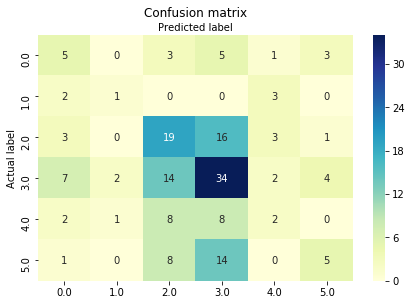

              precision    recall  f1-score   support

         0.0       0.25      0.29      0.27        17
         1.0       0.25      0.17      0.20         6
         2.0       0.37      0.45      0.40        42
         3.0       0.44      0.54      0.49        63
         4.0       0.18      0.10      0.12        21
         5.0       0.38      0.18      0.24        28

   micro avg       0.37      0.37      0.37       177
   macro avg       0.31      0.29      0.29       177
weighted avg       0.36      0.37      0.35       177



Tested Model:  xgb_clf


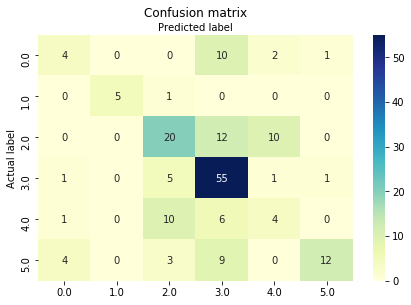

              precision    recall  f1-score   support

         0.0       0.40      0.24      0.30        17
         1.0       1.00      0.83      0.91         6
         2.0       0.51      0.48      0.49        42
         3.0       0.60      0.87      0.71        63
         4.0       0.24      0.19      0.21        21
         5.0       0.86      0.43      0.57        28

   micro avg       0.56      0.56      0.56       177
   macro avg       0.60      0.51      0.53       177
weighted avg       0.57      0.56      0.54       177



Tested Model:  sv_clf


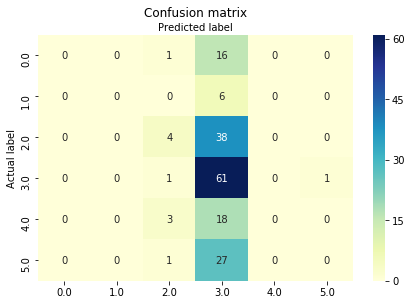

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        17
         1.0       0.00      0.00      0.00         6
         2.0       0.40      0.10      0.15        42
         3.0       0.37      0.97      0.53        63
         4.0       0.00      0.00      0.00        21
         5.0       0.00      0.00      0.00        28

   micro avg       0.37      0.37      0.37       177
   macro avg       0.13      0.18      0.11       177
weighted avg       0.23      0.37      0.23       177





In [76]:
# Bellow, we train our pre-selected baseline models on our train dataset and display the confusion 
# matrix along with the classification report.
tested_models = {
    'lr': LogisticRegression(),
    'dt_cls': DecisionTreeClassifier(),
    'rf_clf': RandomForestClassifier(),
    'adaboost_clf': AdaBoostClassifier(),
    'knn_clf': KNeighborsClassifier(),
    'xgb_clf': XGBClassifier(),
    'sv_clf': SVC()
}

for model in tested_models:
    pipe = BasePipeline(tested_models[model])
    pipe.fit(X_train, y_train)

    y_hat_test = pipe.predict(X_test)

    print('======================')
    print('Tested Model: ', model)
    print('======================')
    rpt.print_confusion_matrix(y_test, y_hat_test)
    print('\n')

**Observations**: As we can see our baseline models performances are not great. our top performer baseline
models are : 
* XGBoost Classifier
* Decision Tree Classifier
* Logistic Regresion
* Random Forest


#### Dealing with imbalance dataset

Because our dataset is not equally spit between our target values (Can be spotted on the Support column of our classification report) it might be interresting to train our models on non-imbalance dataset. One technique to do it is to use the SMOTE class from `imblearn` librairie.

In [77]:
# Deal with imbalance using SMOTE
from imblearn.over_sampling import SMOTE

# Smote train dataset using a balanced split
smote = SMOTE()

In [78]:
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

In [79]:
# Check our train set is fairly balanced
unique, counts = np.unique(y_train_resampled, return_counts=True)
dict(zip(unique, counts))

{0.0: 165, 1.0: 165, 2.0: 165, 3.0: 165, 4.0: 165, 5.0: 165}

Rerun baseline model modelisation on a balanced dataset.

Tested Model:  lr


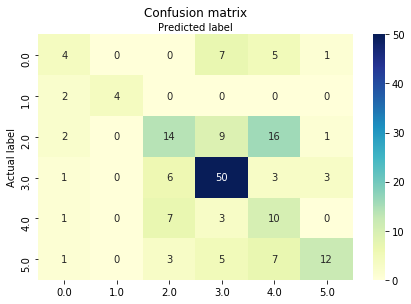

              precision    recall  f1-score   support

         0.0       0.36      0.24      0.29        17
         1.0       1.00      0.67      0.80         6
         2.0       0.47      0.33      0.39        42
         3.0       0.68      0.79      0.73        63
         4.0       0.24      0.48      0.32        21
         5.0       0.71      0.43      0.53        28

   micro avg       0.53      0.53      0.53       177
   macro avg       0.58      0.49      0.51       177
weighted avg       0.56      0.53      0.53       177



Tested Model:  dt_cls


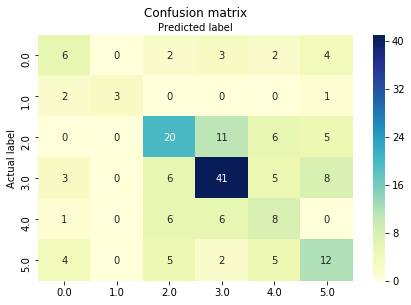

              precision    recall  f1-score   support

         0.0       0.38      0.35      0.36        17
         1.0       1.00      0.50      0.67         6
         2.0       0.51      0.48      0.49        42
         3.0       0.65      0.65      0.65        63
         4.0       0.31      0.38      0.34        21
         5.0       0.40      0.43      0.41        28

   micro avg       0.51      0.51      0.51       177
   macro avg       0.54      0.46      0.49       177
weighted avg       0.52      0.51      0.51       177



Tested Model:  rf_clf


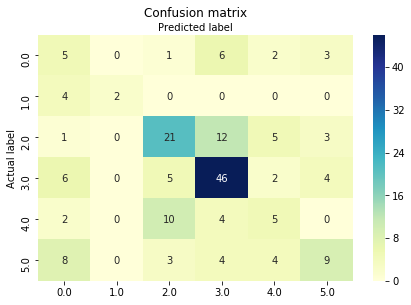

              precision    recall  f1-score   support

         0.0       0.19      0.29      0.23        17
         1.0       1.00      0.33      0.50         6
         2.0       0.53      0.50      0.51        42
         3.0       0.64      0.73      0.68        63
         4.0       0.28      0.24      0.26        21
         5.0       0.47      0.32      0.38        28

   micro avg       0.50      0.50      0.50       177
   macro avg       0.52      0.40      0.43       177
weighted avg       0.51      0.50      0.49       177



Tested Model:  adaboost_clf


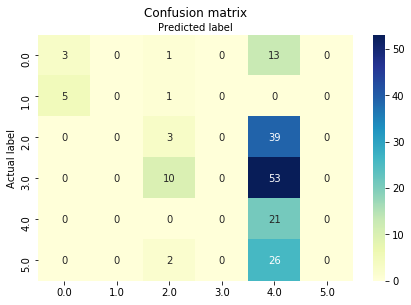

              precision    recall  f1-score   support

         0.0       0.38      0.18      0.24        17
         1.0       0.00      0.00      0.00         6
         2.0       0.18      0.07      0.10        42
         3.0       0.00      0.00      0.00        63
         4.0       0.14      1.00      0.24        21
         5.0       0.00      0.00      0.00        28

   micro avg       0.15      0.15      0.15       177
   macro avg       0.11      0.21      0.10       177
weighted avg       0.09      0.15      0.08       177



Tested Model:  knn_clf


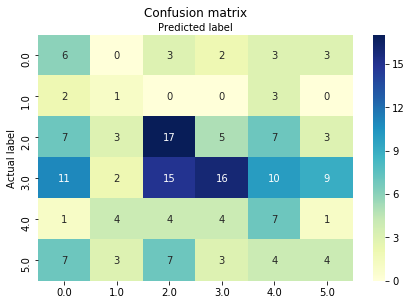

              precision    recall  f1-score   support

         0.0       0.18      0.35      0.24        17
         1.0       0.08      0.17      0.11         6
         2.0       0.37      0.40      0.39        42
         3.0       0.53      0.25      0.34        63
         4.0       0.21      0.33      0.25        21
         5.0       0.20      0.14      0.17        28

   micro avg       0.29      0.29      0.29       177
   macro avg       0.26      0.28      0.25       177
weighted avg       0.35      0.29      0.30       177



Tested Model:  xgb_clf


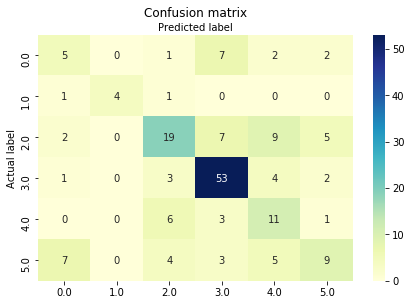

              precision    recall  f1-score   support

         0.0       0.31      0.29      0.30        17
         1.0       1.00      0.67      0.80         6
         2.0       0.56      0.45      0.50        42
         3.0       0.73      0.84      0.78        63
         4.0       0.35      0.52      0.42        21
         5.0       0.47      0.32      0.38        28

   micro avg       0.57      0.57      0.57       177
   macro avg       0.57      0.52      0.53       177
weighted avg       0.57      0.57      0.56       177



Tested Model:  sv_clf


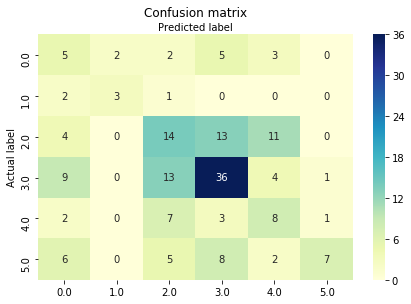

              precision    recall  f1-score   support

         0.0       0.18      0.29      0.22        17
         1.0       0.60      0.50      0.55         6
         2.0       0.33      0.33      0.33        42
         3.0       0.55      0.57      0.56        63
         4.0       0.29      0.38      0.33        21
         5.0       0.78      0.25      0.38        28

   micro avg       0.41      0.41      0.41       177
   macro avg       0.45      0.39      0.39       177
weighted avg       0.47      0.41      0.42       177





In [80]:
# Rerun baseline model modelisation on a balanced dataset.

# Transform resampled X_train into DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled)
X_train_resampled.columns = X.columns

tested_models = {
    'lr': LogisticRegression(),
    'dt_cls': DecisionTreeClassifier(),
    'rf_clf': RandomForestClassifier(),
    'adaboost_clf': AdaBoostClassifier(),
    'knn_clf': KNeighborsClassifier(),
    'xgb_clf': XGBClassifier(),
    'sv_clf': SVC()
}

for model in tested_models:
    pipe = BasePipeline(tested_models[model])
    pipe.fit(X_train_resampled, y_train_resampled)

    y_hat_test = pipe.predict(X_test)

    print('======================')
    print('Tested Model: ', model)
    print('======================')
    rpt.print_confusion_matrix(y_test, y_hat_test)
    print('\n')

**Observations**: On the best performer baseline models, we can see a small increase in recall, precision and F1 score after dealing with our imbalanced dataset.


### Change to Binary Classification

As the results are not great, we are trying bellow to transform the classification tack into a binary classification. In order to reclasssify our target values (`driver_rush`), we will use the same threshold value used previously during our EDA. `driver_rush < 3` vs `driver_rush <= 3`

In [81]:
# Changing target values to have a binary classification task
y_binary = y >= 3
y_binary = y_binary.astype(int)  # change boolean values to int

# Train  Test Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=.3, random_state=42)

Tested Model:  lr


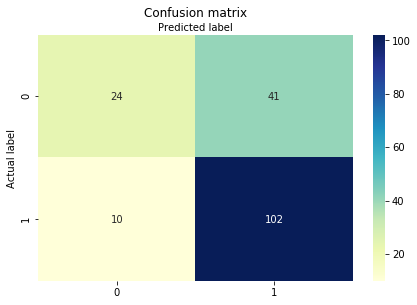

              precision    recall  f1-score   support

           0       0.71      0.37      0.48        65
           1       0.71      0.91      0.80       112

   micro avg       0.71      0.71      0.71       177
   macro avg       0.71      0.64      0.64       177
weighted avg       0.71      0.71      0.68       177



Tested Model:  dt_cls


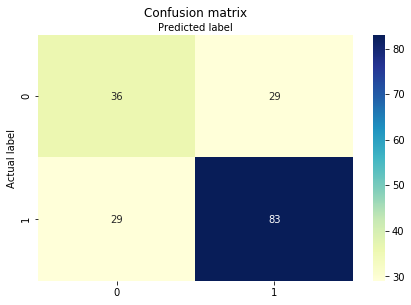

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        65
           1       0.74      0.74      0.74       112

   micro avg       0.67      0.67      0.67       177
   macro avg       0.65      0.65      0.65       177
weighted avg       0.67      0.67      0.67       177



Tested Model:  rf_clf


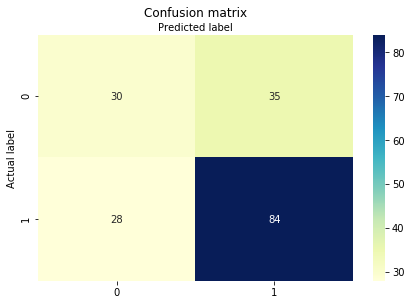

              precision    recall  f1-score   support

           0       0.52      0.46      0.49        65
           1       0.71      0.75      0.73       112

   micro avg       0.64      0.64      0.64       177
   macro avg       0.61      0.61      0.61       177
weighted avg       0.64      0.64      0.64       177



Tested Model:  adaboost_clf


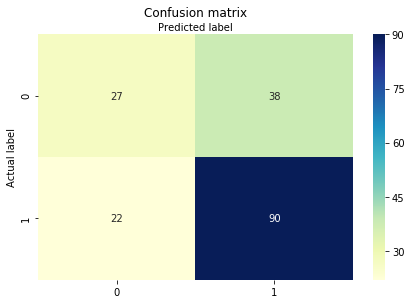

              precision    recall  f1-score   support

           0       0.55      0.42      0.47        65
           1       0.70      0.80      0.75       112

   micro avg       0.66      0.66      0.66       177
   macro avg       0.63      0.61      0.61       177
weighted avg       0.65      0.66      0.65       177



Tested Model:  knn_clf


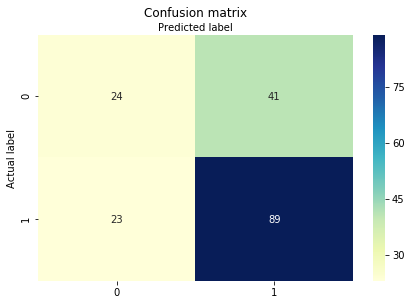

              precision    recall  f1-score   support

           0       0.51      0.37      0.43        65
           1       0.68      0.79      0.74       112

   micro avg       0.64      0.64      0.64       177
   macro avg       0.60      0.58      0.58       177
weighted avg       0.62      0.64      0.62       177



Tested Model:  xgb_clf


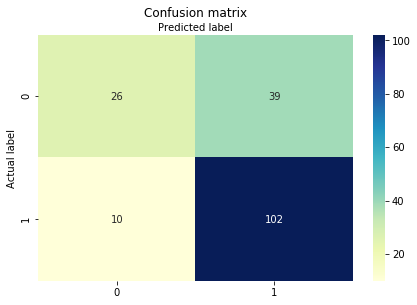

              precision    recall  f1-score   support

           0       0.72      0.40      0.51        65
           1       0.72      0.91      0.81       112

   micro avg       0.72      0.72      0.72       177
   macro avg       0.72      0.66      0.66       177
weighted avg       0.72      0.72      0.70       177



Tested Model:  sv_clf


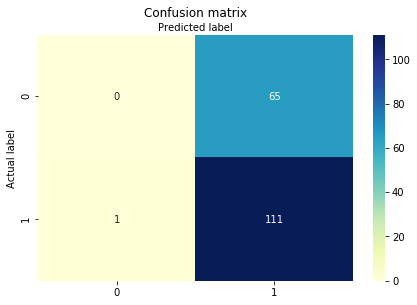

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.63      0.99      0.77       112

   micro avg       0.63      0.63      0.63       177
   macro avg       0.32      0.50      0.39       177
weighted avg       0.40      0.63      0.49       177





In [82]:
# Retrain our pre-selected models to the binary classification
tested_models = {
    'lr': LogisticRegression(),
    'dt_cls': DecisionTreeClassifier(),
    'rf_clf': RandomForestClassifier(),
    'adaboost_clf': AdaBoostClassifier(),
    'knn_clf': KNeighborsClassifier(),
    'xgb_clf': XGBClassifier(),
    'sv_clf': SVC()
}

for model in tested_models:
    pipe = BasePipeline(tested_models[model])
    pipe.fit(X_train, y_train)

    y_hat_test = pipe.predict(X_test)

    print('======================')
    print('Tested Model: ', model)
    print('======================')
    rpt.print_confusion_matrix(y_test, y_hat_test)
    print('\n')

**Observations** : After transforming the multi-classes classification task to a binary classification task, we see an increase in perision, recall and f1-score. XGBoost classifier and logistic Regression have an increase up to 20%.

#### Dealing with imbalance dataset

As the multi-classes classification, we are here in pressence of an imbalance dataset which might impact our model prediction.

In [83]:
# Deal with imbalance using SMOTE
# Smote train dataset using a 50-50 split
smote = SMOTE(sampling_strategy=1)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

# Transform resample X_train into DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled)
X_train_resampled.columns = X.columns

Tested Model:  lr


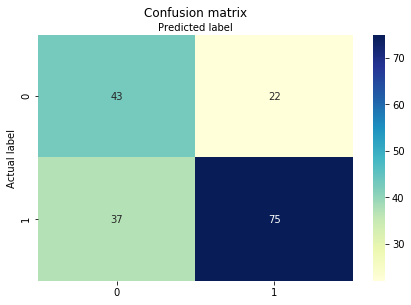

              precision    recall  f1-score   support

           0       0.54      0.66      0.59        65
           1       0.77      0.67      0.72       112

   micro avg       0.67      0.67      0.67       177
   macro avg       0.66      0.67      0.66       177
weighted avg       0.69      0.67      0.67       177



Tested Model:  dt_cls


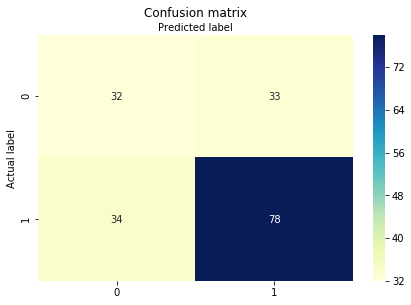

              precision    recall  f1-score   support

           0       0.48      0.49      0.49        65
           1       0.70      0.70      0.70       112

   micro avg       0.62      0.62      0.62       177
   macro avg       0.59      0.59      0.59       177
weighted avg       0.62      0.62      0.62       177



Tested Model:  rf_clf


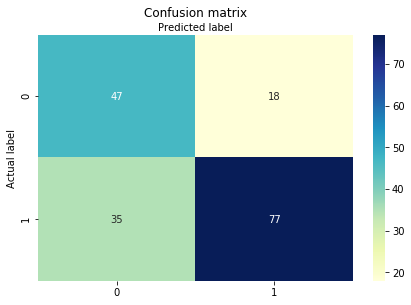

              precision    recall  f1-score   support

           0       0.57      0.72      0.64        65
           1       0.81      0.69      0.74       112

   micro avg       0.70      0.70      0.70       177
   macro avg       0.69      0.71      0.69       177
weighted avg       0.72      0.70      0.71       177



Tested Model:  adaboost_clf


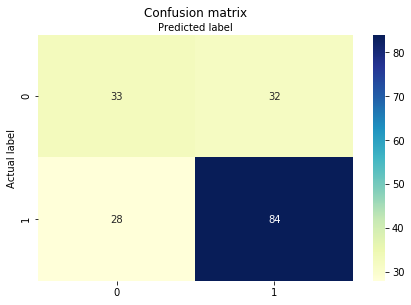

              precision    recall  f1-score   support

           0       0.54      0.51      0.52        65
           1       0.72      0.75      0.74       112

   micro avg       0.66      0.66      0.66       177
   macro avg       0.63      0.63      0.63       177
weighted avg       0.66      0.66      0.66       177



Tested Model:  knn_clf


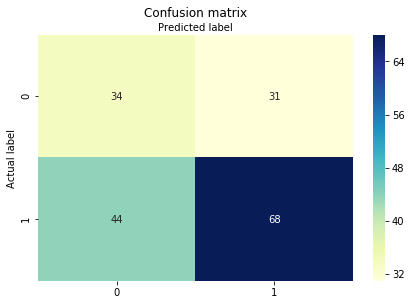

              precision    recall  f1-score   support

           0       0.44      0.52      0.48        65
           1       0.69      0.61      0.64       112

   micro avg       0.58      0.58      0.58       177
   macro avg       0.56      0.57      0.56       177
weighted avg       0.59      0.58      0.58       177



Tested Model:  xgb_clf


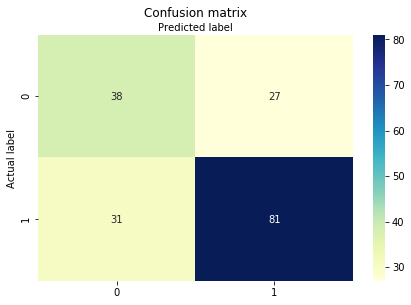

              precision    recall  f1-score   support

           0       0.55      0.58      0.57        65
           1       0.75      0.72      0.74       112

   micro avg       0.67      0.67      0.67       177
   macro avg       0.65      0.65      0.65       177
weighted avg       0.68      0.67      0.67       177



Tested Model:  sv_clf


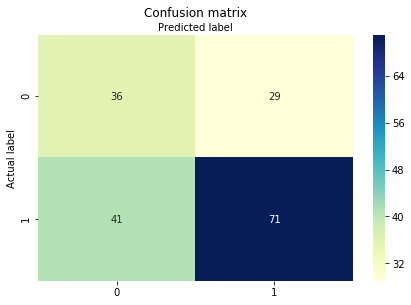

              precision    recall  f1-score   support

           0       0.47      0.55      0.51        65
           1       0.71      0.63      0.67       112

   micro avg       0.60      0.60      0.60       177
   macro avg       0.59      0.59      0.59       177
weighted avg       0.62      0.60      0.61       177





In [84]:
tested_models = {
    'lr': LogisticRegression(),
    'dt_cls': DecisionTreeClassifier(),
    'rf_clf': RandomForestClassifier(),
    'adaboost_clf': AdaBoostClassifier(),
    'knn_clf': KNeighborsClassifier(),
    'xgb_clf': XGBClassifier(),
    'sv_clf': SVC()
}

for model in tested_models:
    pipe = BasePipeline(tested_models[model])
    pipe.fit(X_train_resampled, y_train_resampled)

    y_hat_test = pipe.predict(X_test)

    print('======================')
    print('Tested Model: ', model)
    print('======================')
    rpt.print_confusion_matrix(y_test, y_hat_test)
    print('\n')

**Observations** : Interestingly enough, The Random Forest classifier is the one that most benefit from the balanced train dataset. Also, we notice that XGB, Decision Tree and Logistic Regression perfomed less when trained with a balance train set.

### Hyper-parameters fine tuning


In the following section, we are going to fine-tune our Random forest classifier as it is the best performer on a balanced training dataset.

In [99]:
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Build RandomForest classifier
clf = RandomForestClassifier()

# Specify parameters and distributions to sample from
param_dist = {'n_estimators': sp_randint(2, 25),
              'max_depth': sp_randint(3, 8),
              'max_features': sp_randint(1, 11),
              'min_samples_split': sp_randint(2, 11),
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

# Run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

start = time()
random_search.fit(X, y_binary)
print('RandomizedSearchCV took %.2f seconds for %d candidates'
      ' parameter settings.' % ((time() - start), n_iter_search))
rpt.report_top_scores(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {'n_estimators': [2, 5, 10, 15, 25],
              'max_depth': [3, 5, 8, None],
              'max_features': [1, 3, 10],
              'min_samples_split': [2, 3, 10],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
start = time()
grid_search.fit(X, y_binary)

print('GridSearchCV took %.2f seconds for %d candidate parameter settings.'
      % (time() - start, len(grid_search.cv_results_['params'])))
rpt.report_top_scores(grid_search.cv_results_)

RandomizedSearchCV took 2.89 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.710 (std: 0.098)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 8, 'n_estimators': 13}

Model with rank: 2
Mean validation score: 0.698 (std: 0.089)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 9, 'min_samples_split': 7, 'n_estimators': 23}

Model with rank: 3
Mean validation score: 0.680 (std: 0.079)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 10, 'min_samples_split': 3, 'n_estimators': 17}

GridSearchCV took 95.53 seconds for 720 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.720 (std: 0.093)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 2, 'n_estimators': 25}

Model with rank: 2
Mean validation score: 0.719 (std: 0.096)
Paramete